# COSMOS "Super-deblended" Photometry Catalog

### Ks band from Laigle et al., 2016
### IRAC 3.6$\mu$m, 4.5$\mu$m, 5.8$\mu$m, and 8.0$\mu$m
### Super-deblended: Spitzer MIPS/24$\mu$m, Herschel/PACS 100$\mu$m, Herschel/PACS 160$\mu$m
###                                 Herschel/SPIRE 250$\mu$m, Herschel/SPIRE 350$\mu$m, Herschel/SPIRE 500$\mu$m

https://drive.google.com/drive/folders/18iknbRBUJSqU3Tc5Fh6DRVJFrnLcWcl4

Title: ''Super-deblended'' Dust Emission in Galaxies: II. Far-IR to (sub)Millimeter 
	Photometry and High Redshift Galaxy Candidates in the Full COSMOS Field 
Authors: S. Jin, E. Daddi, D. Liu, V. Smolcic, E. Schinnerer, A. Calabro, Q. Gu, J. Delhaize, 
	I. Delvecchio, Y. Gao, M. Salvato, A. Puglisi, M. Dickinson, F. Bertoldi, M. Sargent, 
	M. Novak, G. E. Magdis, I. Aretxaga, G. W. Wilson, and P. Capak.
    
https://arxiv.org/pdf/1807.04697.pdf

In [296]:
# Importing regular packages. The herschelhelp_internal.utils is already installed in my machine
# so the only thing I have to do is to run the 'source activate herschelhelp_internal' in the terminal 
# and after that change the kernel in the notebook. 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.table import Table, Column
import pandas as pd
import os

# from herschelhelp_internal.utils import astrometric_correction, mag_to_flux, flux_to_mag

from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from astropy import visualization as vz
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [4]:
#New catalog with super-deblended data
#HELP project data 
#Laigle et al., 2016 data

jin_data = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                      'COSMOS/Jin_Daddi_COSMOS/COSMOS_Super_Deblended_FIRmm_Catalog_20180719.fits', format = 'fits')

help_data   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                         'HELP_SanityCheck/HELP_subsample_merged.fits', format = 'fits')

jin_help = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                      'COSMOS/Jin_Daddi_COSMOS/Jin_HELP_2arcsec.fits', format = 'fits')

In [27]:
help_data = help_data.to_pandas()
help_data = help_data.fillna(-99.0)
help_data = Table.from_pandas(help_data)

jin_help = jin_help.to_pandas()
jin_help = jin_help.fillna(-99.0)
jin_help = Table.from_pandas(jin_help)

In [28]:
print('Objects in Jin et al., 2018');print('%i'%len(jin_data))

print('Objects with zspec > 0 or != -99 in Jin et al., 2018'); print('%i'%len(jin_data[jin_data['zspec'] > 0]))

print('Objects inside the UltraVISTA  area, Jin et al., 2018'); print('%i'%len(jin_data[jin_data['goodArea'] == 1]))

Objects in Jin et al., 2018
195107
Objects with zspec > 0 or != -99 in Jin et al., 2018
24817
Objects inside the UltraVISTA  area, Jin et al., 2018
192303


In [345]:
bands_jin  = ['FCH1', 'FCH2', 'FCH3', 'FCH4',\
              'F24', 'F100' ,'F160',\
              'F250', 'F350', 'F500']

jin_err    = ['DFCH1', 'DFCH2', 'DFCH3', 'DFCH4',\
              'DF24', 'DF100' ,'DF160',\
              'DF250', 'DF350', 'DF500']

help_bands = ['help_f_irac_i1', 'help_f_irac_i2', 'help_f_irac_i3', 'help_f_irac_i4',\
              'help_f_mips_24', 'help_f_pacs_green','help_f_pacs_red',\
              'help_f_spire_250', 'help_f_spire_350','help_f_spire_500']

help_err   = ['help_ferr_irac_i1', 'help_ferr_irac_i2', 'help_ferr_irac_i3', 'help_ferr_irac_i4',\
              'help_ferr_mips_24', 'help_ferr_pacs_green','help_ferr_pacs_red',\
              'help_ferr_spire_250', 'help_ferr_spire_350','help_ferr_spire_500']

bands      = ['IRAC1', 'IRAC2', 'IRAC3', 'IRAC4',\
             '24um', '100um', '160um',\
             '250um', '350um', '500um']  

In [314]:
print('Band: \t\t\t Data in HELP: \t\tNon_Zero:\tJin et al., 2018:\tNon_zero:')
for i in range(len(bands_jin)):
    
    x = jin_data[bands_jin[i]][jin_data[bands_jin[i]] != -99.0]
    y = help_data[help_bands[i]][help_data[help_bands[i]] != -99.0]
    
    print('%20s\t\t%i\t\t%i\t\t%i\t\t\t%i'\
          %(help_bands[i], len(help_data[help_bands[i]]), len(y),\
            len(jin_data[bands_jin[i]]), len(x)))

Band: 			 Data in HELP: 		Non_Zero:	Jin et al., 2018:	Non_zero:
      help_f_irac_i1		2599374		0		195107			185233
      help_f_irac_i2		2599374		0		195107			184976
      help_f_irac_i3		2599374		2		195107			183655
      help_f_irac_i4		2599374		13		195107			186024
      help_f_mips_24		2599374		320092		195107			194428
   help_f_pacs_green		2599374		320092		195107			194123
     help_f_pacs_red		2599374		320092		195107			116347
    help_f_spire_250		2599374		25898		195107			62471
    help_f_spire_350		2599374		25898		195107			39821
    help_f_spire_500		2599374		25898		195107			17457


In [317]:
print('Band: \t\t\t Data in HELP: \t\tNon_Zero:\tJin et al., 2018:\tNon_zero:')
for i in range(len(bands_jin)):
    
    x = jin_help[bands_jin[i]][(jin_help[bands_jin[i]] != -99.0) & (jin_help[bands_jin[i]] < 5000)]
    y = jin_help[help_bands[i]][(jin_help[help_bands[i]] != -99.0) & (jin_help[help_bands[i]] < 5000)]
    
    print('%20s\t\t%i\t\t%i\t\t%i\t\t\t%i'\
          %(help_bands[i], len(jin_help[help_bands[i]]), len(y),\
            len(jin_help[bands_jin[i]]), len(x)))

Band: 			 Data in HELP: 		Non_Zero:	Jin et al., 2018:	Non_zero:
      help_f_irac_i1		191743		0		191743			184811
      help_f_irac_i2		191743		0		191743			184555
      help_f_irac_i3		191743		1		191743			183209
      help_f_irac_i4		191743		10		191743			185535
      help_f_mips_24		191743		147932		191743			191452
   help_f_pacs_green		191743		134884		191743			191184
     help_f_pacs_red		191743		104459		191743			114086
    help_f_spire_250		191743		9070		191743			60209
    help_f_spire_350		191743		12604		191743			37824
    help_f_spire_500		191743		16951		191743			15856


zspec > 0: 24805 --- zphot > 0: 178608


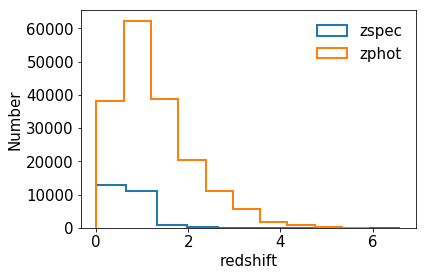

In [412]:
Zspec = jin_help['zspec'][jin_help['zspec'] > 0]
Zphot = jin_help['zphot'][jin_help['zphot'] > 0]

print('zspec > 0: %i --- zphot > 0: %i'%(len(Zspec), len(Zphot)))

plt.figure()
plt.hist(Zspec, histtype = 'step', label = 'zspec', lw = 2)
plt.hist(Zphot, histtype = 'step', label = 'zphot', lw = 2)
plt.ylabel('Number', fontsize = 15)
plt.xlabel('redshift', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper right')

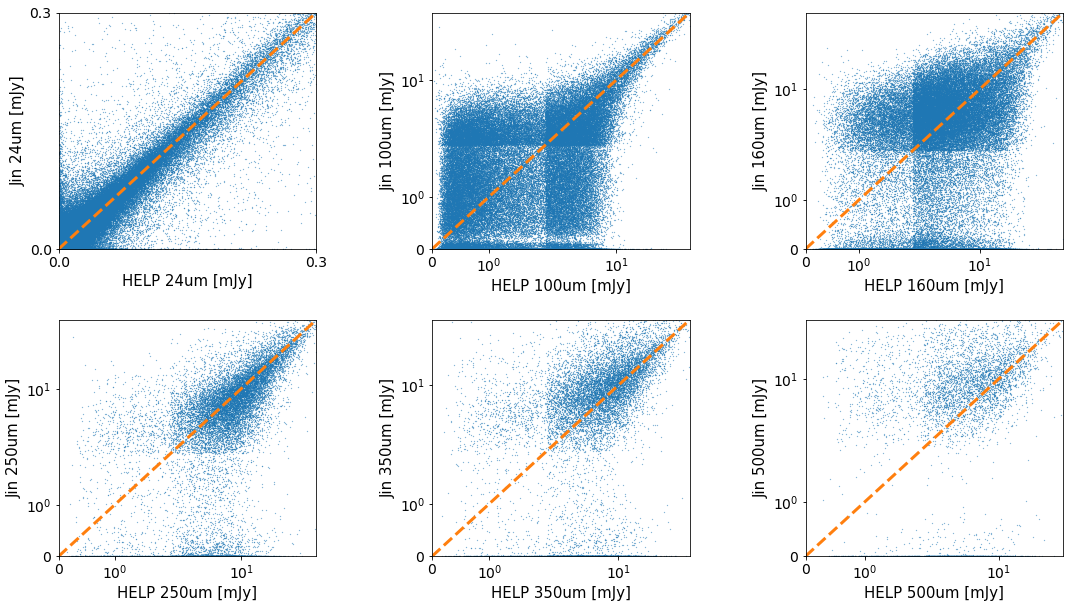

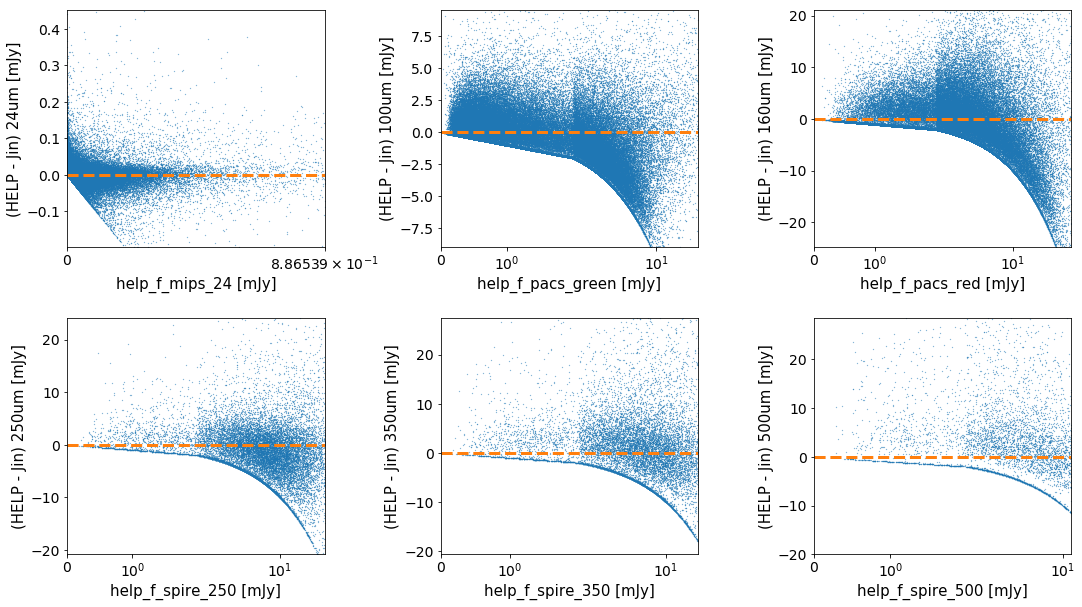

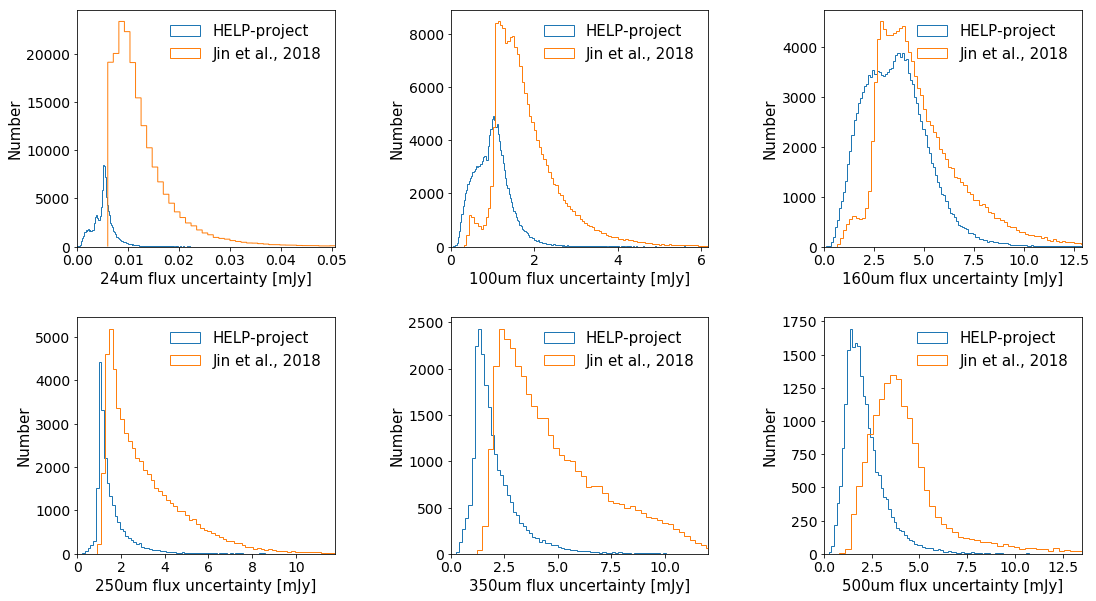

In [417]:
X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(4,10,1):
    
    x = jin_help[help_bands[i]]*1e-3
    y = jin_help[bands_jin[i]]
    
    axs[i-4].scatter(x, y, s = 0.05, c = 'C0')
    axs[i-4].plot(X, X, '--', lw = 3, c = 'C1')
    axs[i-4].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xscale('symlog')
    axs[i-4].set_yscale('symlog')
    axs[i-4].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i-4].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    if (i == 4):
        axs[i-4].set_xlim(0, 0.3)
        axs[i-4].set_ylim(0, 0.3)
        axs[i-4].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i-4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(4,10,1):
    
    x = jin_help[help_bands[i]]*1e-3
    y = jin_help[bands_jin[i]]
    
    # To avoid extreme values in the limits and make it automatically
    XY = y-x
    XY = XY[(XY < 30) & (XY > -30)]
    
    axs[i-4].scatter(x, y-x, s = 0.05, c = 'C0')
    axs[i-4].axhline(0, 0, 1000, ls = '--', lw = 3, c = 'C1')
    axs[i-4].set_ylabel('(HELP - Jin) %s [mJy]'%(bands[i]), fontsize = 15)
    axs[i-4].set_xlabel('%s [mJy]'%help_bands[i], fontsize = 15)
    axs[i-4].set_xscale('symlog')
    axs[i-4].set_xlim(0, np.nanpercentile(x, 99.5))
    axs[i-4].set_ylim(np.nanpercentile(XY, 0.1), np.nanpercentile(XY, 99.5))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14) 
    
fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)  

axs = axs.ravel()

for i in range(4,10,1):
    
    x = jin_help[help_err[i]]*1e-3
    y = jin_help[jin_err[i]]
    
    x = x[(x > 0) & (x < 15)]
    y = y[(y > 0) & (y < 15)]
    
    axs[i-4].hist(x, bins = 'scott', histtype = 'step', label = 'HELP-project')
    axs[i-4].hist(y, bins = 'scott', histtype = 'step', label = 'Jin et al., 2018')
    axs[i-4].set_ylabel('Number', fontsize = 15)
    axs[i-4].set_xlabel('%s flux uncertainty [mJy]'%bands[i], fontsize = 15)
#     axs[i-4].set_xscale('symlog')
    axs[i-4].set_xlim(0, np.percentile(y, 99.5))
#     axs[i-4].set_ylim(np.nanpercentile(XY, 0.1), np.nanpercentile(XY, 99.5))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i-4].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper right')

# Checking a sample with valid zspec

In [418]:
# Selecting only those sources with reliable zspec

jin_help_zspec = jin_help[jin_help['zspec'] > 0]

print('Band: \t\t\t Data in HELP: \t\tNon_Zero:\tJin et al., 2018:\tNon_zero:')
for i in range(len(bands_jin)):
    
    x = jin_help_zspec[bands_jin[i]][(jin_help_zspec[bands_jin[i]] != -99.0) & (jin_help_zspec[bands_jin[i]] < 5000)]
    y = jin_help_zspec[help_bands[i]][(jin_help_zspec[help_bands[i]] != -99.0) & (jin_help_zspec[help_bands[i]] < 5000)]
    
    print('%20s\t\t%i\t\t%i\t\t%i\t\t\t%i'\
          %(help_bands[i], len(jin_help_zspec[help_bands[i]]), len(y),\
            len(jin_help_zspec[bands_jin[i]]), len(x)))

Band: 			 Data in HELP: 		Non_Zero:	Jin et al., 2018:	Non_zero:
      help_f_irac_i1		24805		0		24805			24633
      help_f_irac_i2		24805		0		24805			24632
      help_f_irac_i3		24805		0		24805			24483
      help_f_irac_i4		24805		7		24805			24609
      help_f_mips_24		24805		22280		24805			24805
   help_f_pacs_green		24805		18222		24805			24805
     help_f_pacs_red		24805		14118		24805			16480
    help_f_spire_250		24805		2800		24805			7058
    help_f_spire_350		24805		4399		24805			4644
    help_f_spire_500		24805		5850		24805			1260


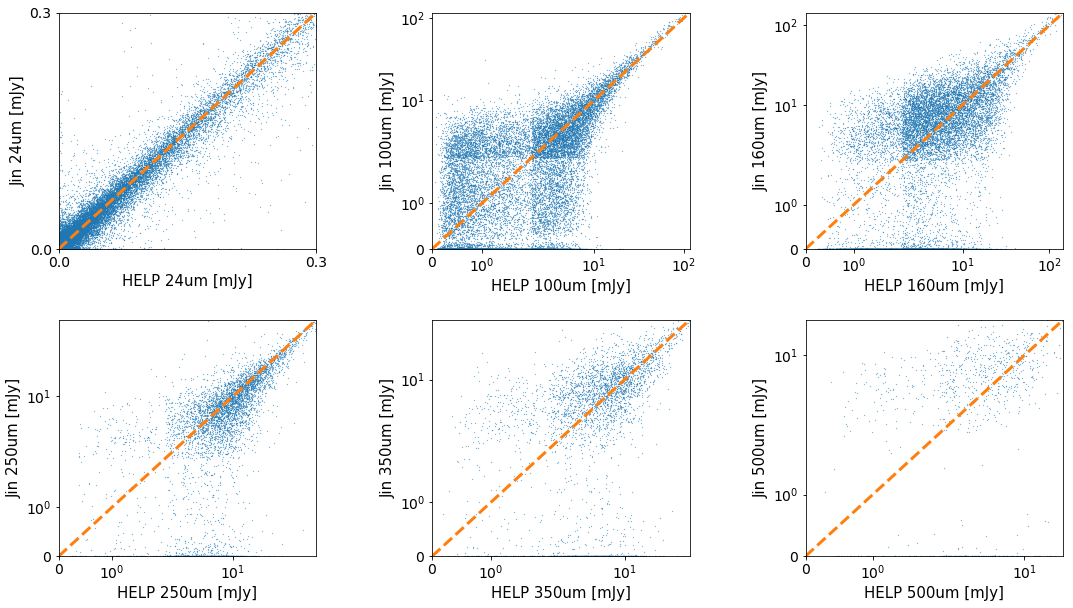

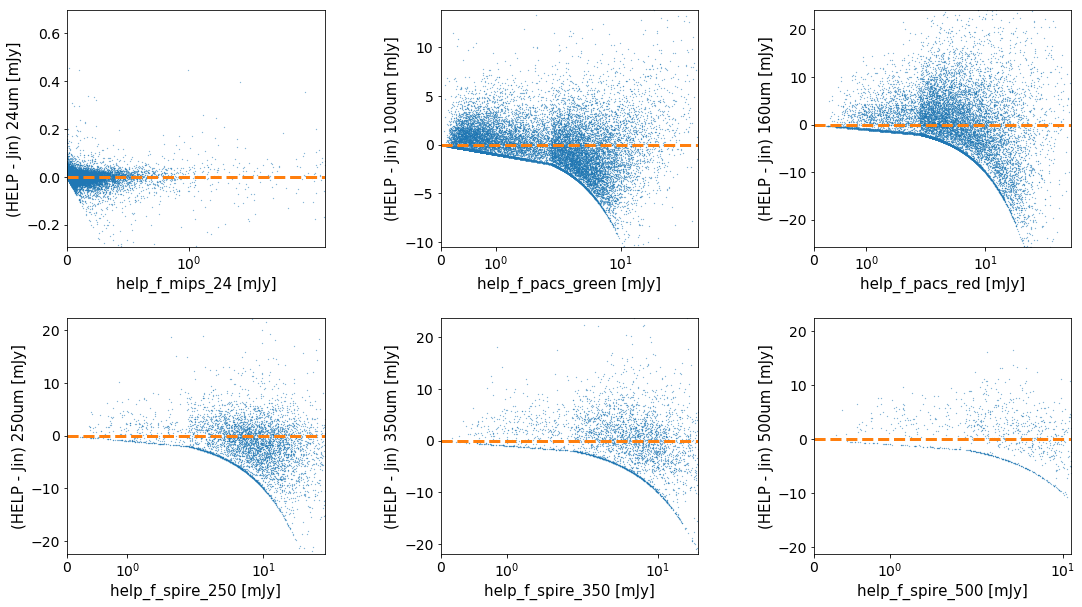

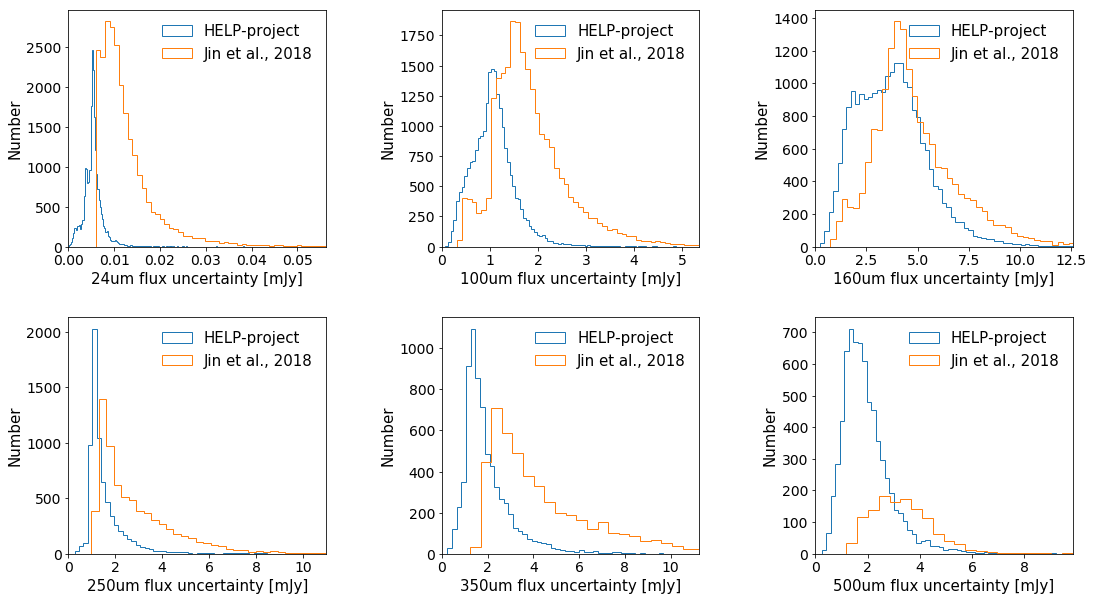

In [419]:
X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(4,10,1):
    
    x = jin_help_zspec[help_bands[i]]*1e-3
    y = jin_help_zspec[bands_jin[i]]
    
    axs[i-4].scatter(x, y, s = 0.05, c = 'C0')
    axs[i-4].plot(X, X, '--', lw = 3, c = 'C1')
    axs[i-4].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xscale('symlog')
    axs[i-4].set_yscale('symlog')
    axs[i-4].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i-4].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    if (i == 4):
        axs[i-4].set_xlim(0, 0.3)
        axs[i-4].set_ylim(0, 0.3)
        axs[i-4].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i-4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(4,10,1):
    
    x = jin_help_zspec[help_bands[i]]*1e-3
    y = jin_help_zspec[bands_jin[i]]
    
    # To avoid extreme values in the limits and make it automatically
    XY = y-x
    XY = XY[(XY < 30) & (XY > -30)]
    
    axs[i-4].scatter(x, y-x, s = 0.05, c = 'C0')
    axs[i-4].axhline(0, 0, 1000, ls = '--', lw = 3, c = 'C1')
    axs[i-4].set_ylabel('(HELP - Jin) %s [mJy]'%(bands[i]), fontsize = 15)
    axs[i-4].set_xlabel('%s [mJy]'%help_bands[i], fontsize = 15)
    axs[i-4].set_xscale('symlog')
    axs[i-4].set_xlim(0, np.nanpercentile(x, 99.5))
    axs[i-4].set_ylim(np.nanpercentile(XY, 0.1), np.nanpercentile(XY, 99.5))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14) 
    
fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)  

axs = axs.ravel()

for i in range(4,10,1):
    
    x = jin_help_zspec[help_err[i]]*1e-3
    y = jin_help_zspec[jin_err[i]]
    
    x = x[(x > 0) & (x < 15)]
    y = y[(y > 0) & (y < 15)]
    
    axs[i-4].hist(x, bins = 'scott', histtype = 'step', label = 'HELP-project')
    axs[i-4].hist(y, bins = 'scott', histtype = 'step', label = 'Jin et al., 2018')
    axs[i-4].set_ylabel('Number', fontsize = 15)
    axs[i-4].set_xlabel('%s flux uncertainty [mJy]'%bands[i], fontsize = 15)
#     axs[i-4].set_xscale('symlog')
    axs[i-4].set_xlim(0, np.percentile(y, 99.5))
#     axs[i-4].set_ylim(np.nanpercentile(XY, 0.1), np.nanpercentile(XY, 99.5))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i-4].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper right')

# Colored by SNR for objects with zspec

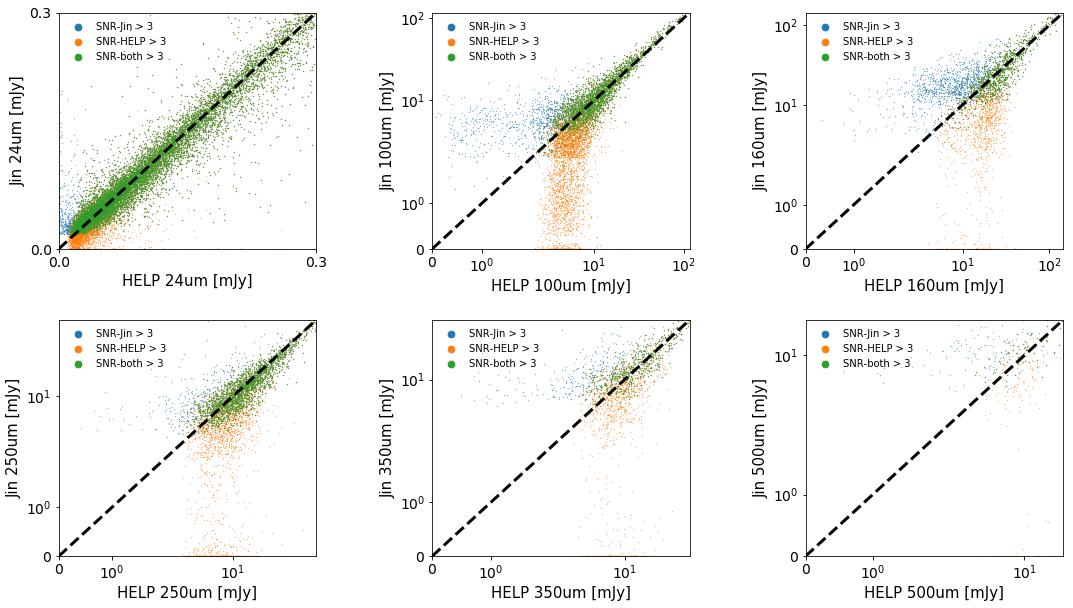

In [420]:
X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(4,10,1):
    
#     For the limits
    x = jin_help_zspec[help_bands[i]]*1e-3
    y = jin_help_zspec[bands_jin[i]]
    
#     For the SNR
    snr_1 = jin_help_zspec[bands_jin[i]]/jin_help_zspec[jin_err[i]]
    snr_2 = jin_help_zspec[help_bands[i]]/jin_help_zspec[help_err[i]]
    
#     For the contraints
    l     = jin_help_zspec[snr_1 > 3]
    m     = jin_help_zspec[snr_2 > 3]
    n     = jin_help_zspec[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i-4].scatter(l[help_bands[i]]*1e-3, l[bands_jin[i]], s = 0.05, c = 'C0', label = 'SNR-Jin > 3')
    axs[i-4].scatter(m[help_bands[i]]*1e-3, m[bands_jin[i]], s = 0.05, c = 'C1', label = 'SNR-HELP > 3')
    axs[i-4].scatter(n[help_bands[i]]*1e-3, n[bands_jin[i]], s = 0.05, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i-4].plot(X, X, '--', lw = 3, c = 'k')
    axs[i-4].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xscale('symlog')
    axs[i-4].set_yscale('symlog')
    axs[i-4].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i-4].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i-4].legend(frameon = False, prop = {'size': 10}, markerscale = 30 , loc = 'upper left')
    
    if (i == 4):
        axs[i-4].set_xlim(0, 0.3)
        axs[i-4].set_ylim(0, 0.3)
        axs[i-4].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i-4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Colored by SNR for all objects in the original sample

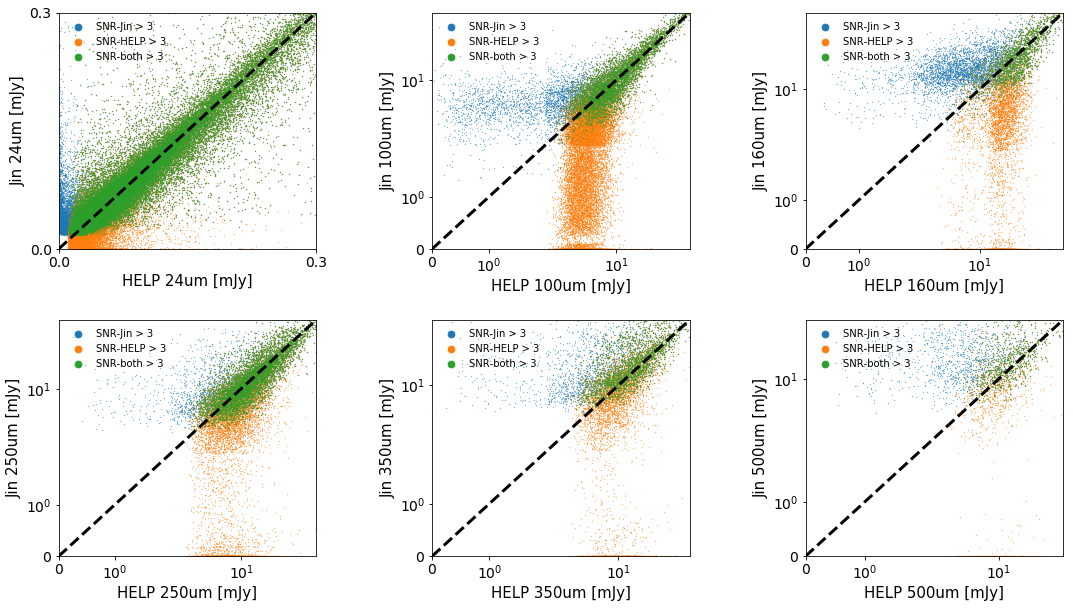

In [421]:
jin_help_zspec = jin_help

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(4,10,1):
    
#     For the limits
    x = jin_help_zspec[help_bands[i]]*1e-3
    y = jin_help_zspec[bands_jin[i]]
    
#     For the SNR
    snr_1 = jin_help_zspec[bands_jin[i]]/jin_help_zspec[jin_err[i]]
    snr_2 = jin_help_zspec[help_bands[i]]/jin_help_zspec[help_err[i]]
    
#     For the contraints
    l     = jin_help_zspec[snr_1 > 3]
    m     = jin_help_zspec[snr_2 > 3]
    n     = jin_help_zspec[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i-4].scatter(l[help_bands[i]]*1e-3, l[bands_jin[i]], s = 0.05, c = 'C0', label = 'SNR-Jin > 3')
    axs[i-4].scatter(m[help_bands[i]]*1e-3, m[bands_jin[i]], s = 0.05, c = 'C1', label = 'SNR-HELP > 3')
    axs[i-4].scatter(n[help_bands[i]]*1e-3, n[bands_jin[i]], s = 0.05, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i-4].plot(X, X, '--', lw = 3, c = 'k')
    axs[i-4].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i-4].set_xscale('symlog')
    axs[i-4].set_yscale('symlog')
    axs[i-4].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i-4].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i-4].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i-4].legend(frameon = False, prop = {'size': 10}, markerscale = 30 , loc = 'upper left')
    
    if (i == 4):
        axs[i-4].set_xlim(0, 0.3)
        axs[i-4].set_ylim(0, 0.3)
        axs[i-4].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i-4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))